In [46]:
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import Normalize
from PIL import Image


from pc import PS
from modules import ADC,DAC,CHIP
from cimCommand import CMD,CmdData,Packet
from cimCommand.singleCmdInfo import *

from util import plot_v_cond

In [358]:
import numpy as np

npy_file_path = 'result/zju_log2/res_matrix1'
array = np.load(npy_file_path+".npy")
np.savetxt(npy_file_path+".csv", array, delimiter=',', fmt='%.4f')

In [48]:
img = Image.open('images/zju.png').convert('L')
img = img.resize((256, 256), Image.LANCZOS)

img = np.array(img)
img = np.where(img >= 128, 0, 1).astype(np.uint8)

In [ ]:
chip=CHIP(PS(host="192.168.1.10", port = 7, debug=0),init=True)
chip.set_device_cfg(deviceType=0)

In [50]:
def set_device(row,col,write_voltage,tg,pulse_width):
    chip.set_op_mode2(read=False,row=True,clearv=False)
    chip.set_pulse_width(pulse_width)
    chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)

def reset_device(row,col,write_voltage,tg,pulse_width):
    chip.set_op_mode2(read=False,row=False,clearv=False)
    chip.set_pulse_width(pulse_width)
    chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)

In [51]:
# chip.ps.debug = 1
# set_device(0,0,2,2.5,500e-6)
# chip.ps.debug = 0
# 在每个单元格中显示数值
# for i in range(res_matrix.shape[0]):
#     for j in range(res_matrix .shape[1]):
#         plt.text(j, i, f'{res_matrix[i,j]:.1f}', ha='center', va='center', color='black')

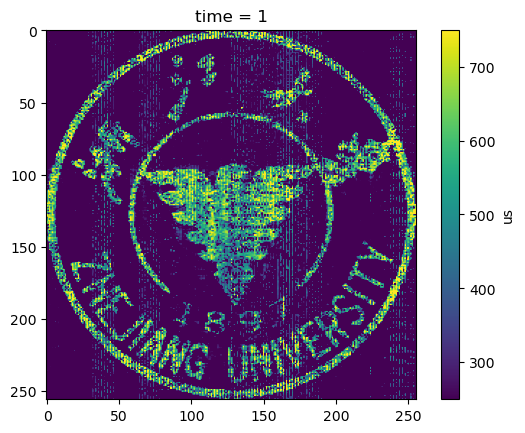

In [203]:
matrix_base = np.load('result/zju_log2/res_matrix0.npy')
matrix_base1 = np.load('result/zju_log2/res_matrix1.npy')
np.save('result/zju_log2/res_matrix1_base.npy', matrix_base1-matrix_base)
cmap = plt.cm.viridis
norm = Normalize(vmin=250, vmax=750)
im = plt.imshow(matrix_base1-matrix_base, cmap=cmap,norm=norm)
cbar = plt.colorbar(im)
cbar.set_label("us")
plt.title("time = 1")
plt.show()

### 写阵列

In [197]:
row_index = [i for i in range(0,256)]
col_index = [i for i in range(0,256)]
res_matrix = chip.read_crossbar2(row_index=row_index,col_index=col_index,
                                 read_voltage=0.1,tg=5,gain=1,row=True,out_type=1)

cmap = plt.cm.viridis
norm = Normalize(vmin=200, vmax=800)
im = plt.imshow(res_matrix, cmap=cmap,norm=norm)
cbar = plt.colorbar(im)
cbar.set_label("us")
plt.title("time = 1")
plt.show()

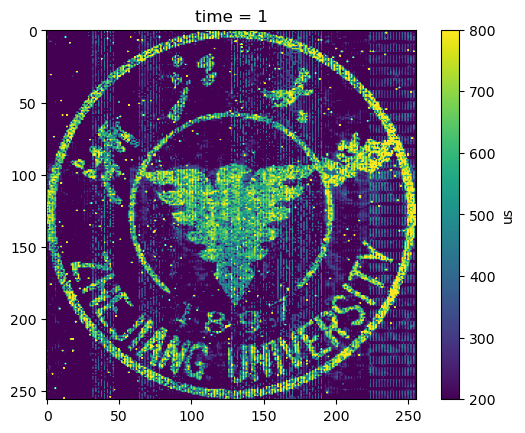

In [198]:
cmap = plt.cm.viridis
norm = Normalize(vmin=200, vmax=800)
im = plt.imshow(res_matrix, cmap=cmap,norm=norm)
cbar = plt.colorbar(im)
cbar.set_label("us")
plt.title("time = 1")
plt.show()

In [199]:
np.save('result/zju_log2/res_matrix1.npy', res_matrix)

In [195]:
# 电导<800,且img为1,就需要set
condition_set = (res_matrix < 800) & (img > 0.5)
# 电导>200,且img为0,就需要reset
condition_reset = (res_matrix > 200) & (img < 0.5)
print(np.sum(condition_set),np.sum(condition_reset))

17019 6597


In [196]:
# 电导<800,且img为1,就需要set
condition_set = (res_matrix < 800) & (img > 0.5)
# 电导>200,且img为0,就需要reset
condition_reset = (res_matrix > 200) & (img < 0.5)

is_set = True
chip.write_point2(device_array=condition_set,write_voltage=2,tg=2,pulse_width=100e-6,set_device=is_set)

# is_set = False
# chip.write_point2(device_array=condition_reset,write_voltage=1.6,tg=5,pulse_width=300e-6,set_device=is_set)

17019
需要写17019个点


In [ ]:
for i in range(20):
    is_set = False
    chip.write_point2(device_array=res_matrix,write_voltage=1.6,tg=5,pulse_width=100e-6,set_device=is_set)

    is_set = True
    chip.write_point2(device_array=res_matrix,write_voltage=2,tg=2,pulse_width=100e-6,set_device=is_set)

In [ ]:
res_matrix = chip.read_crossbar2(row_index=row_index,col_index=col_index,
                                 read_voltage=0.1,tg=5,gain=1,row=True,out_type=1)
cmap = plt.cm.viridis
norm = Normalize(vmin=0, vmax=1000)
im = plt.imshow(res_matrix, cmap=cmap,norm=norm)
cbar = plt.colorbar(im)
cbar.set_label("us")
plt.show()

### 扫描一个点

In [89]:
def set_device(row,col,write_voltage,tg,pulse_width):
    chip.set_op_mode2(read=False,row=True,clearv=False)
    chip.set_pulse_width(pulse_width)
    chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)

def reset_device(row,col,write_voltage,tg,pulse_width):
    chip.set_op_mode2(read=False,row=False,clearv=False)
    chip.set_pulse_width(pulse_width)
    chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)

def read_device(row,col,read_voltage,tg):
    chip.set_op_mode2(read=True,row=True,clearv=False)
    vres = chip.read2(row_index=[row],col_index=[col],read_voltage=read_voltage,tg=tg,check_tia=True,sum=False)
    return vres[0,0]

In [299]:
row ,col = 130,120
matrix = np.zeros((256,256))
matrix[row,col]=1

In [347]:
is_set = False
chip.write_point2(device_array=matrix,write_voltage=2,tg=5,pulse_width=100e-6,set_device=is_set)
v1 = read_device(row ,col,0.1,5)
print(chip.voltage_to_cond(v1))

1
需要写1个点
58.259799633798856


In [348]:
chip.ps.debug = 0
# v = read_device(row ,col,0.1,5)
vresult = []
for i in range(0,15):
    tg = 0.6 + i*0.1

    chip.write_point2(device_array=matrix,write_voltage=2,tg=tg,pulse_width=100e-6,set_device=True)
    v = read_device(row ,col,0.1,5)
    vresult.append(v)

1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点
1
需要写1个点


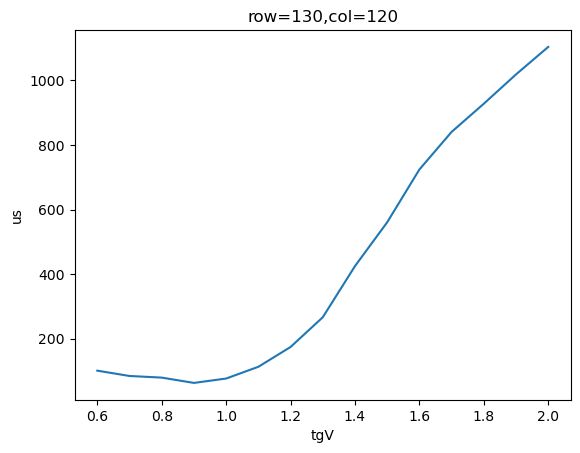

In [349]:
cond = chip.voltage_to_cond(np.array(vresult))
plt.figure()
plt.plot([0.6 + i*0.1 for i in range(15)],cond)
plt.title(f'row={row},col={col}')
plt.xlabel('tgV')
plt.ylabel('us')
plt.show()

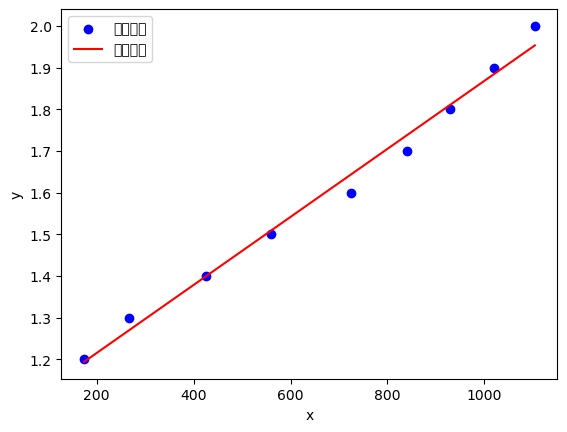

拟合的线性方程为: y = 0.0008161013623861578x + 1.052245944709637


In [355]:
import numpy as np
import matplotlib.pyplot as plt
y= np.array([1.2 + i*0.1 for i in range(9)])
x= np.array(cond[-9:])
coefficients = np.polyfit(x, y, deg=1)

# 获取拟合的斜率和截距
slope, intercept = coefficients

# 计算拟合的 y 值
y_fit = 0.0008161013623861578*x + 1.052245944709637

# 绘制原始数据和拟合曲线
plt.scatter(x, y, color='blue', label='原始数据')
plt.plot(x, y_fit, color='red', label='拟合曲线')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 打印拟合结果
print(f"拟合的线性方程为: y = {slope}x + {intercept}")
